# Saturation analysis

In [1]:
%pylab notebook
%matplotlib notebook

import os, glob

import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import exifread
import rawpy

Populating the interactive namespace from numpy and matplotlib


## Image made on purpose to saturate all pixels

In [2]:
with rawpy.imread('../astrophotography_data/MilkyWayPrettyBoy/tests/saturated_ISO100/DSC07070.ARW') as raw:
    array = raw.raw_image_visible
    print(array[2000:2005,1000:1005])

[[16376 16376 16376 16376 16376]
 [16376 16376 16376 16376 16376]
 [16376 16376 16376 16376 16376]
 [16376 16376 16376 16376 16376]
 [16376 16376 16376 16376 16376]]


## Finding saturated pixels

One image from highest exposure set (ISO 12800, 3.2s, f/2.8):

In [3]:
path = '../astrophotography_data/MilkyWayPrettyBoy/12800/light'
# path = '../astrophotography_data/MilkyWayPrettyBoy/800/light'

list_p = glob.glob(os.path.join(path,'*.ARW'))
image = list_p[1]

<IPython.core.display.Javascript object>


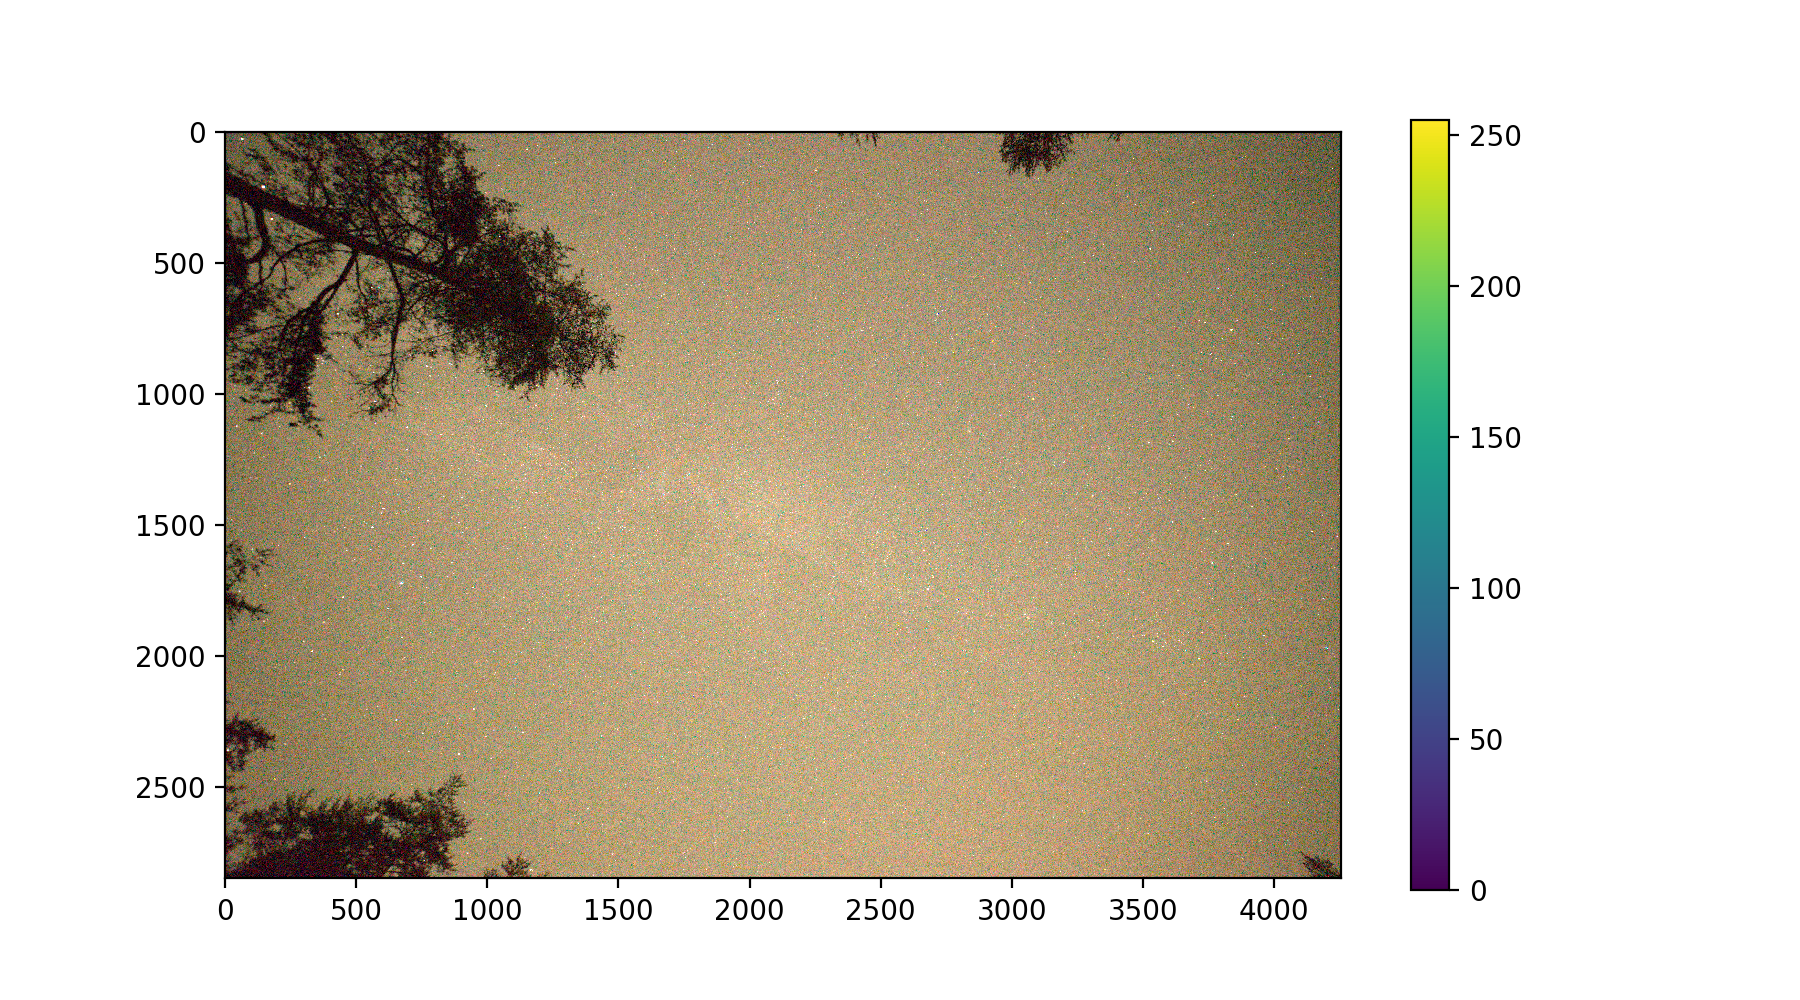

In [4]:
with rawpy.imread(image) as raw:
    rgb = raw.postprocess()
    plt.figure(figsize=[9, 5])
    plt.imshow(rgb)
    plt.colorbar()

Top left corner has a saturated star, and a bright but unsaturated one. From the RGB image, one might think both are saturated though. This is caused by clipping at the imshow level.

<IPython.core.display.Javascript object>


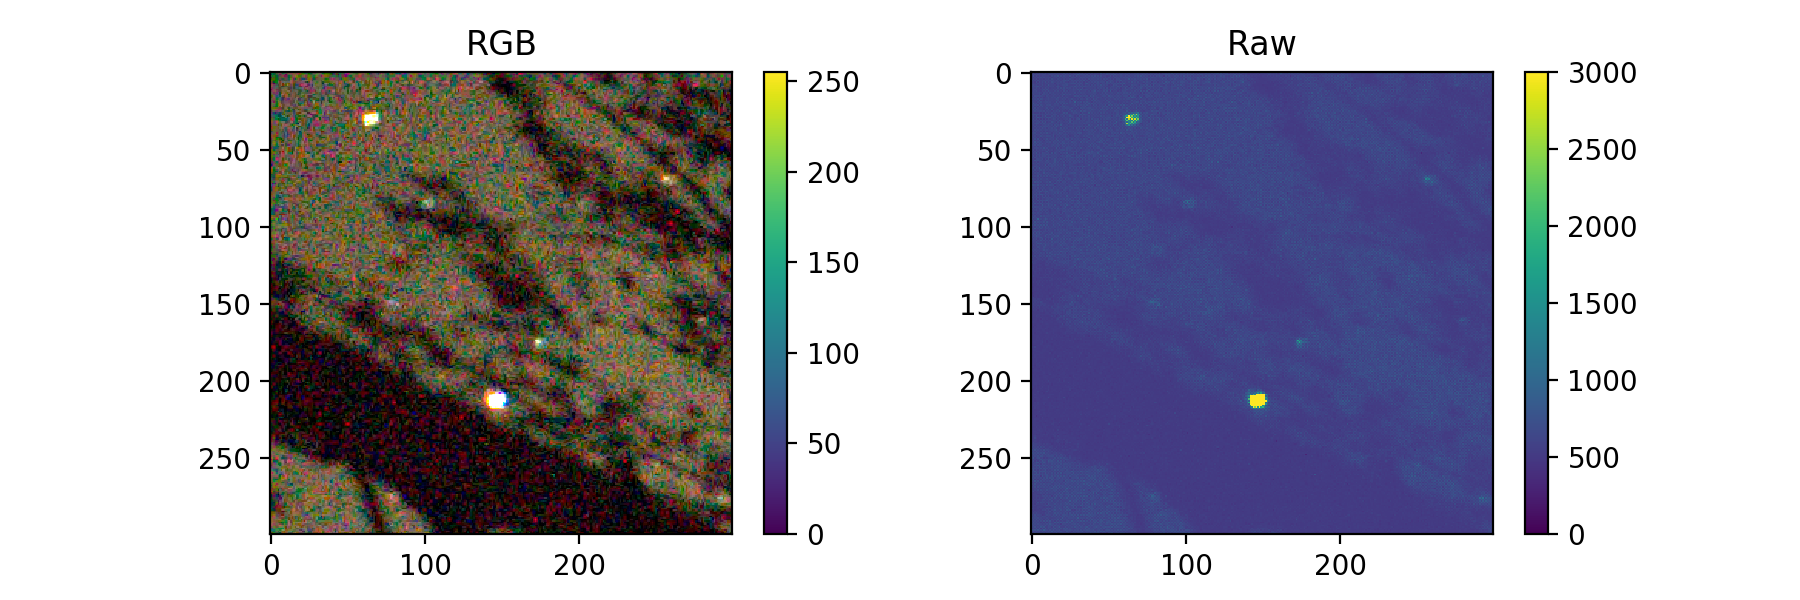

[[ 78  98 109 102  88 102 120  73  96 120 123 125 121 115 114  86  80  89
   83  71]
 [109 106 103  96  98  98  92  91 100 111 116 118 100 120 117 109  79  93
   81  99]
 [113 118 124  94 111 100  90  97 102 108 111 101  90  77  74  84  89  97
   78  97]
 [ 94 111  96  93  92  99 100  99  95  85  92 113 114  97  94  89  89 103
   90  93]
 [ 57 115  94  84  89  90  68  78  77  56  42  56  64  68  68  76  82 106
   99  76]
 [ 57 115 116  78  86  76  60  47  53  57  58  55  93  99  96  59  77 112
   94  71]
 [ 70 114 115  79  56  96  83  86  82  87  99 100 104 113 123  63  74  69
   74  91]
 [ 80 104  88  81  57 106 105  98  83  99  97 109 118 127 105  66  54  68
   71  94]
 [ 93 103 109 102  91  89  90  89  86  94  84  92 100  97  89  46  49  79
   96  64]
 [ 86  74  71  60  63  72  78  94  84  67  75  97 102 114  95  44  53  70
   82  57]
 [ 69  50  31  40  62  86  92 100  99  78  57  78 103  97  84  87  97  83
  101  97]
 [ 78  67  78 102  83  59  66  79  77  73  65  88  90  82  85 116

In [5]:
figsize(9,3)
fig = plt.figure()
with rawpy.imread(image) as raw:
    rgb = raw.postprocess()
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(rgb[0:300,0:300])
    plt.colorbar()
    a.set_title('RGB')
    a = fig.add_subplot(1, 2, 2)
    plt.imshow(raw.raw_image_visible[0:300,0:300],vmin=0,vmax=3000)
    plt.colorbar()
    a.set_title('Raw')
    
    print(rgb[55:75,20:40,1])

Attempt with linear RGB processing. Fainter star still looks saturated in the resulting RGB image, as a result of imshow clipping.

<IPython.core.display.Javascript object>


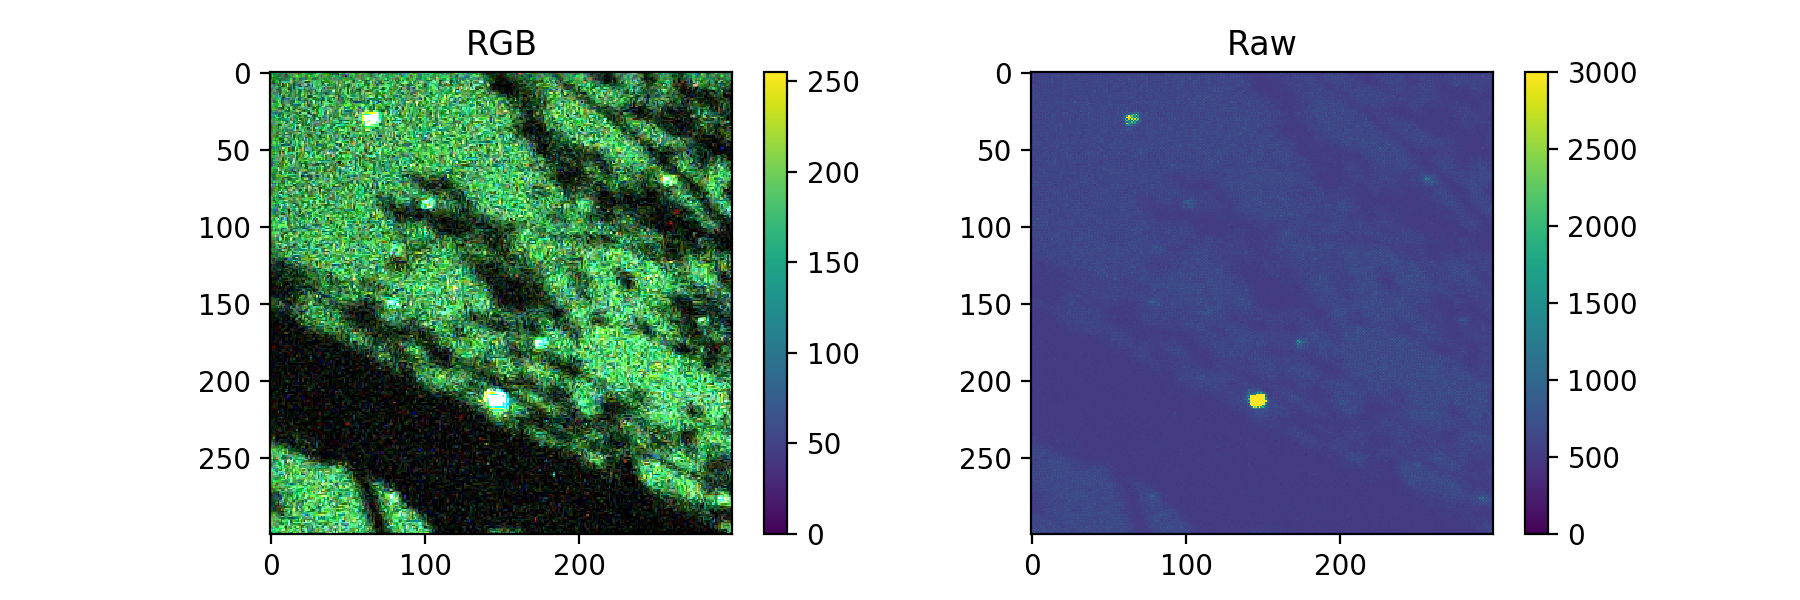

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[140 164 212 198 158 186 268 232 168 211 239 230 230 213 184 214 110 171
  148 165]
 [178 164 147 147 187 177 177 160 160 184 190 193 156 238 168 214 122 171
  171 166]
 [188 195 218 222 222 186 149 180 181 181 193 163 138 118 116 156 156 125
  123 145]
 [180 185 127 127 169 179 179 201 201 155 192 249 231 181 173 173 180 186
  184 167]
 [ 74 107 115  99 143 143 128 158 159 103  66  87  97  88  88 142 142 194
  179 133]
 [ 74 219 190  99 118 139 139  96  87  87  83  83 149 174 116 100 179 230
  150 118]
 [102 182 214  99  60 178 171 171 150 151 180 187 187 233 254 107 137 120
  106 168]
 [155 173 130 103  76 201 200 178 195 195 137 180 157 248 192 109 117 117
  127 187]
 [185 189 209 177 141 139 137 137 145 182 130 163 157 240 152  82  97 176
  191 154]
 [184 150 141 109 111 123 136 172 151 127 125 163 189 240 167  72  94 122
   93  93]
 [152 115  80  80 118 174 196 218 218 152  97 153 202 180 143 147 175 175
  191 166]
 [103 130 168 224 166 112 136 165 165 151 167 190 182 150 137 241

In [6]:
figsize(9,3)
fig = plt.figure()
with rawpy.imread(image) as raw:
    rgb_linear = raw.postprocess(gamma=(1,1), output_bps=16, use_camera_wb=False,
                                 use_auto_wb=False, no_auto_bright=True, no_auto_scale=True,
                                 output_color=rawpy.ColorSpace.raw)
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(rgb_linear[0:300,0:300])
    plt.colorbar()
    a.set_title('RGB')
    a = fig.add_subplot(1, 2, 2)
    plt.imshow(raw.raw_image_visible[0:300,0:300],vmin=0,vmax=3000)
    plt.colorbar()
    a.set_title('Raw')
    
    print(rgb_linear[55:75,20:40,1])

In [7]:
with rawpy.imread(image) as raw:
    array = raw.raw_image_visible
    saturated = np.where(array > 16300)
    print(saturated)

(array([ 147,  148,  148,  149,  149,  150,  158,  159,  159,  160,  210,
        210,  211,  211,  211,  212,  212,  212,  212,  213,  213,  213,
        213,  213,  213,  214,  214,  214,  214,  215,  215,  215,  215,
        215,  215,  216,  273,  481,  484,  519,  525,  576,  584,  598,
        598,  599,  599,  636,  636,  637,  696,  696,  697,  697,  697,
        698,  716,  717,  717,  718,  757,  757,  757,  757,  758,  758,
        758,  799,  800,  800,  845,  845,  845,  942,  943,  970,  981,
        982, 1020, 1020, 1020, 1021, 1021, 1031, 1031, 1031, 1032, 1032,
       1032, 1084, 1085, 1097, 1097, 1098, 1109, 1120, 1129, 1135, 1164,
       1168, 1187, 1187, 1187, 1188, 1218, 1232, 1245, 1280, 1281, 1288,
       1289, 1289, 1289, 1290, 1314, 1350, 1351, 1364, 1374, 1375, 1375,
       1375, 1376, 1376, 1376, 1384, 1390, 1390, 1391, 1391, 1391, 1391,
       1395, 1414, 1440, 1490, 1494, 1515, 1517, 1550, 1550, 1551, 1551,
       1564, 1565, 1572, 1577, 1596, 1599, 1599, 1